# Integrantes

1. a1805	Natalia Beatriz	Diaz

2. a1822	Cristian Patricio Salinas Talamilla

3. a1812	Ezequiel Eduardo Maudet

4. a1819	Manuel Pineyro

# Consigna
Se requiere construir una regresión que nos permita predecir el valor medio de las casas en distritos de California, EEUU (medidos en cientos de miles de dólares $100,000). Este dataset se deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EEUU publica datos de muestra (un bloque típicamente tiene una población de 600 a 3000 personas).

Los atributos, en el orden en que se guardaron en el dataset, son:

* MedInc: Ingreso medio en el bloque
* HouseAge: Edad mediana de las casas en el bloque
* AveRooms: Número promedio de habitaciones por hogar.
* AveBedrms: Número promedio de dormitorios por hogar.
* Population: Población del bloque add / 
* AveOccup: Número promedio de miembros por hogar.
* Latitude: Latitud del bloque
* Longitude: Longitud del bloque

Y el target es:


MedHouseVal: Mediana del costo de casas en el bloque (en unidades de a $100.000)


# Desarrollo - California Housing

## Ingesta de Datos

In [88]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

In [89]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target
print(X)
print(y)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [90]:
california_housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [91]:
california_housing['target_names']

['MedHouseVal']

In [92]:
# Transformamos en Pandas DataSet
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [93]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [94]:
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Consiga 1:
Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

In [95]:
df_california.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [96]:
df_california.corr()[['MedHouseVal']].sort_values(['MedHouseVal'], ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

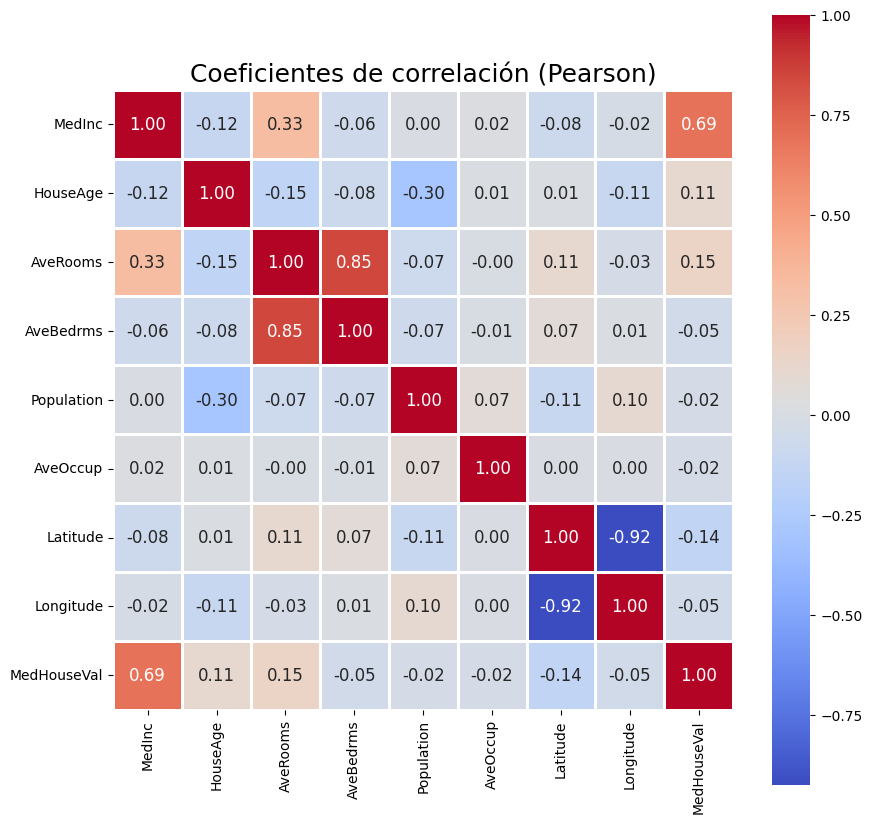

In [97]:
plt.figure(figsize = (5,5))
sns.heatmap(df_california.corr(), 
            cbar = True, 
            square = True, 
            annot=True, 
            fmt= '.2f',
            annot_kws={'size': 12}, 
            cmap= 'coolwarm', 
            linewidths=1)
plt.xticks(rotation = 90)
#plt.yticks(rotation = 45)
plt.gcf().set_size_inches(10, 10)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "black")

Text(0.5, 1.0, 'Coeficientes de correlación (Pearson)')

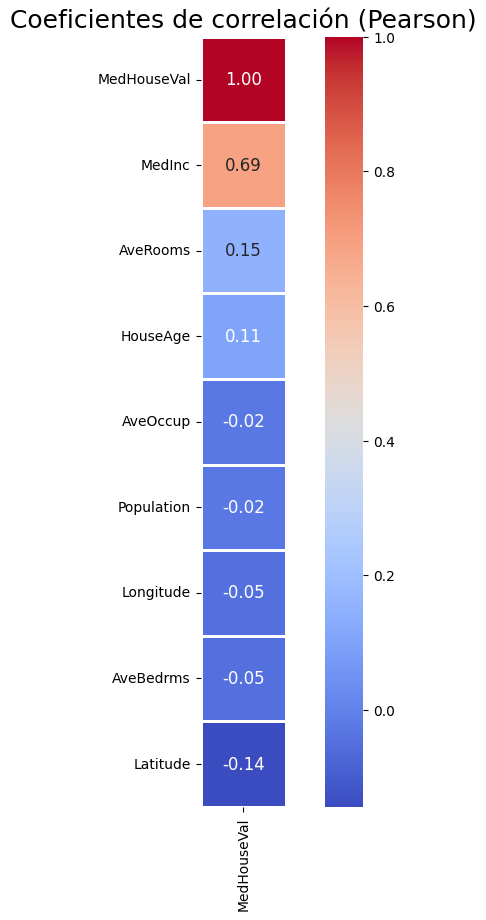

In [98]:
plt.figure(figsize = (5,5))
sns.heatmap(df_california.corr()[['MedHouseVal']].sort_values(['MedHouseVal'], ascending=False), 
            cbar = True, 
            square = True, 
            annot=True, 
            fmt= '.2f',
            annot_kws={'size': 12}, 
            cmap= 'coolwarm', 
            linewidths=1)
plt.xticks(rotation = 90)
#plt.yticks(rotation = 45)
plt.gcf().set_size_inches(10, 10)
plt.title("Coeficientes de correlación (Pearson)", fontsize = 18, color = "black")

In [99]:
# Crear la grilla de gráficos
#Demora un monton por eso esta como imagen pegada
#sns.pairplot(df_california, kind='reg')

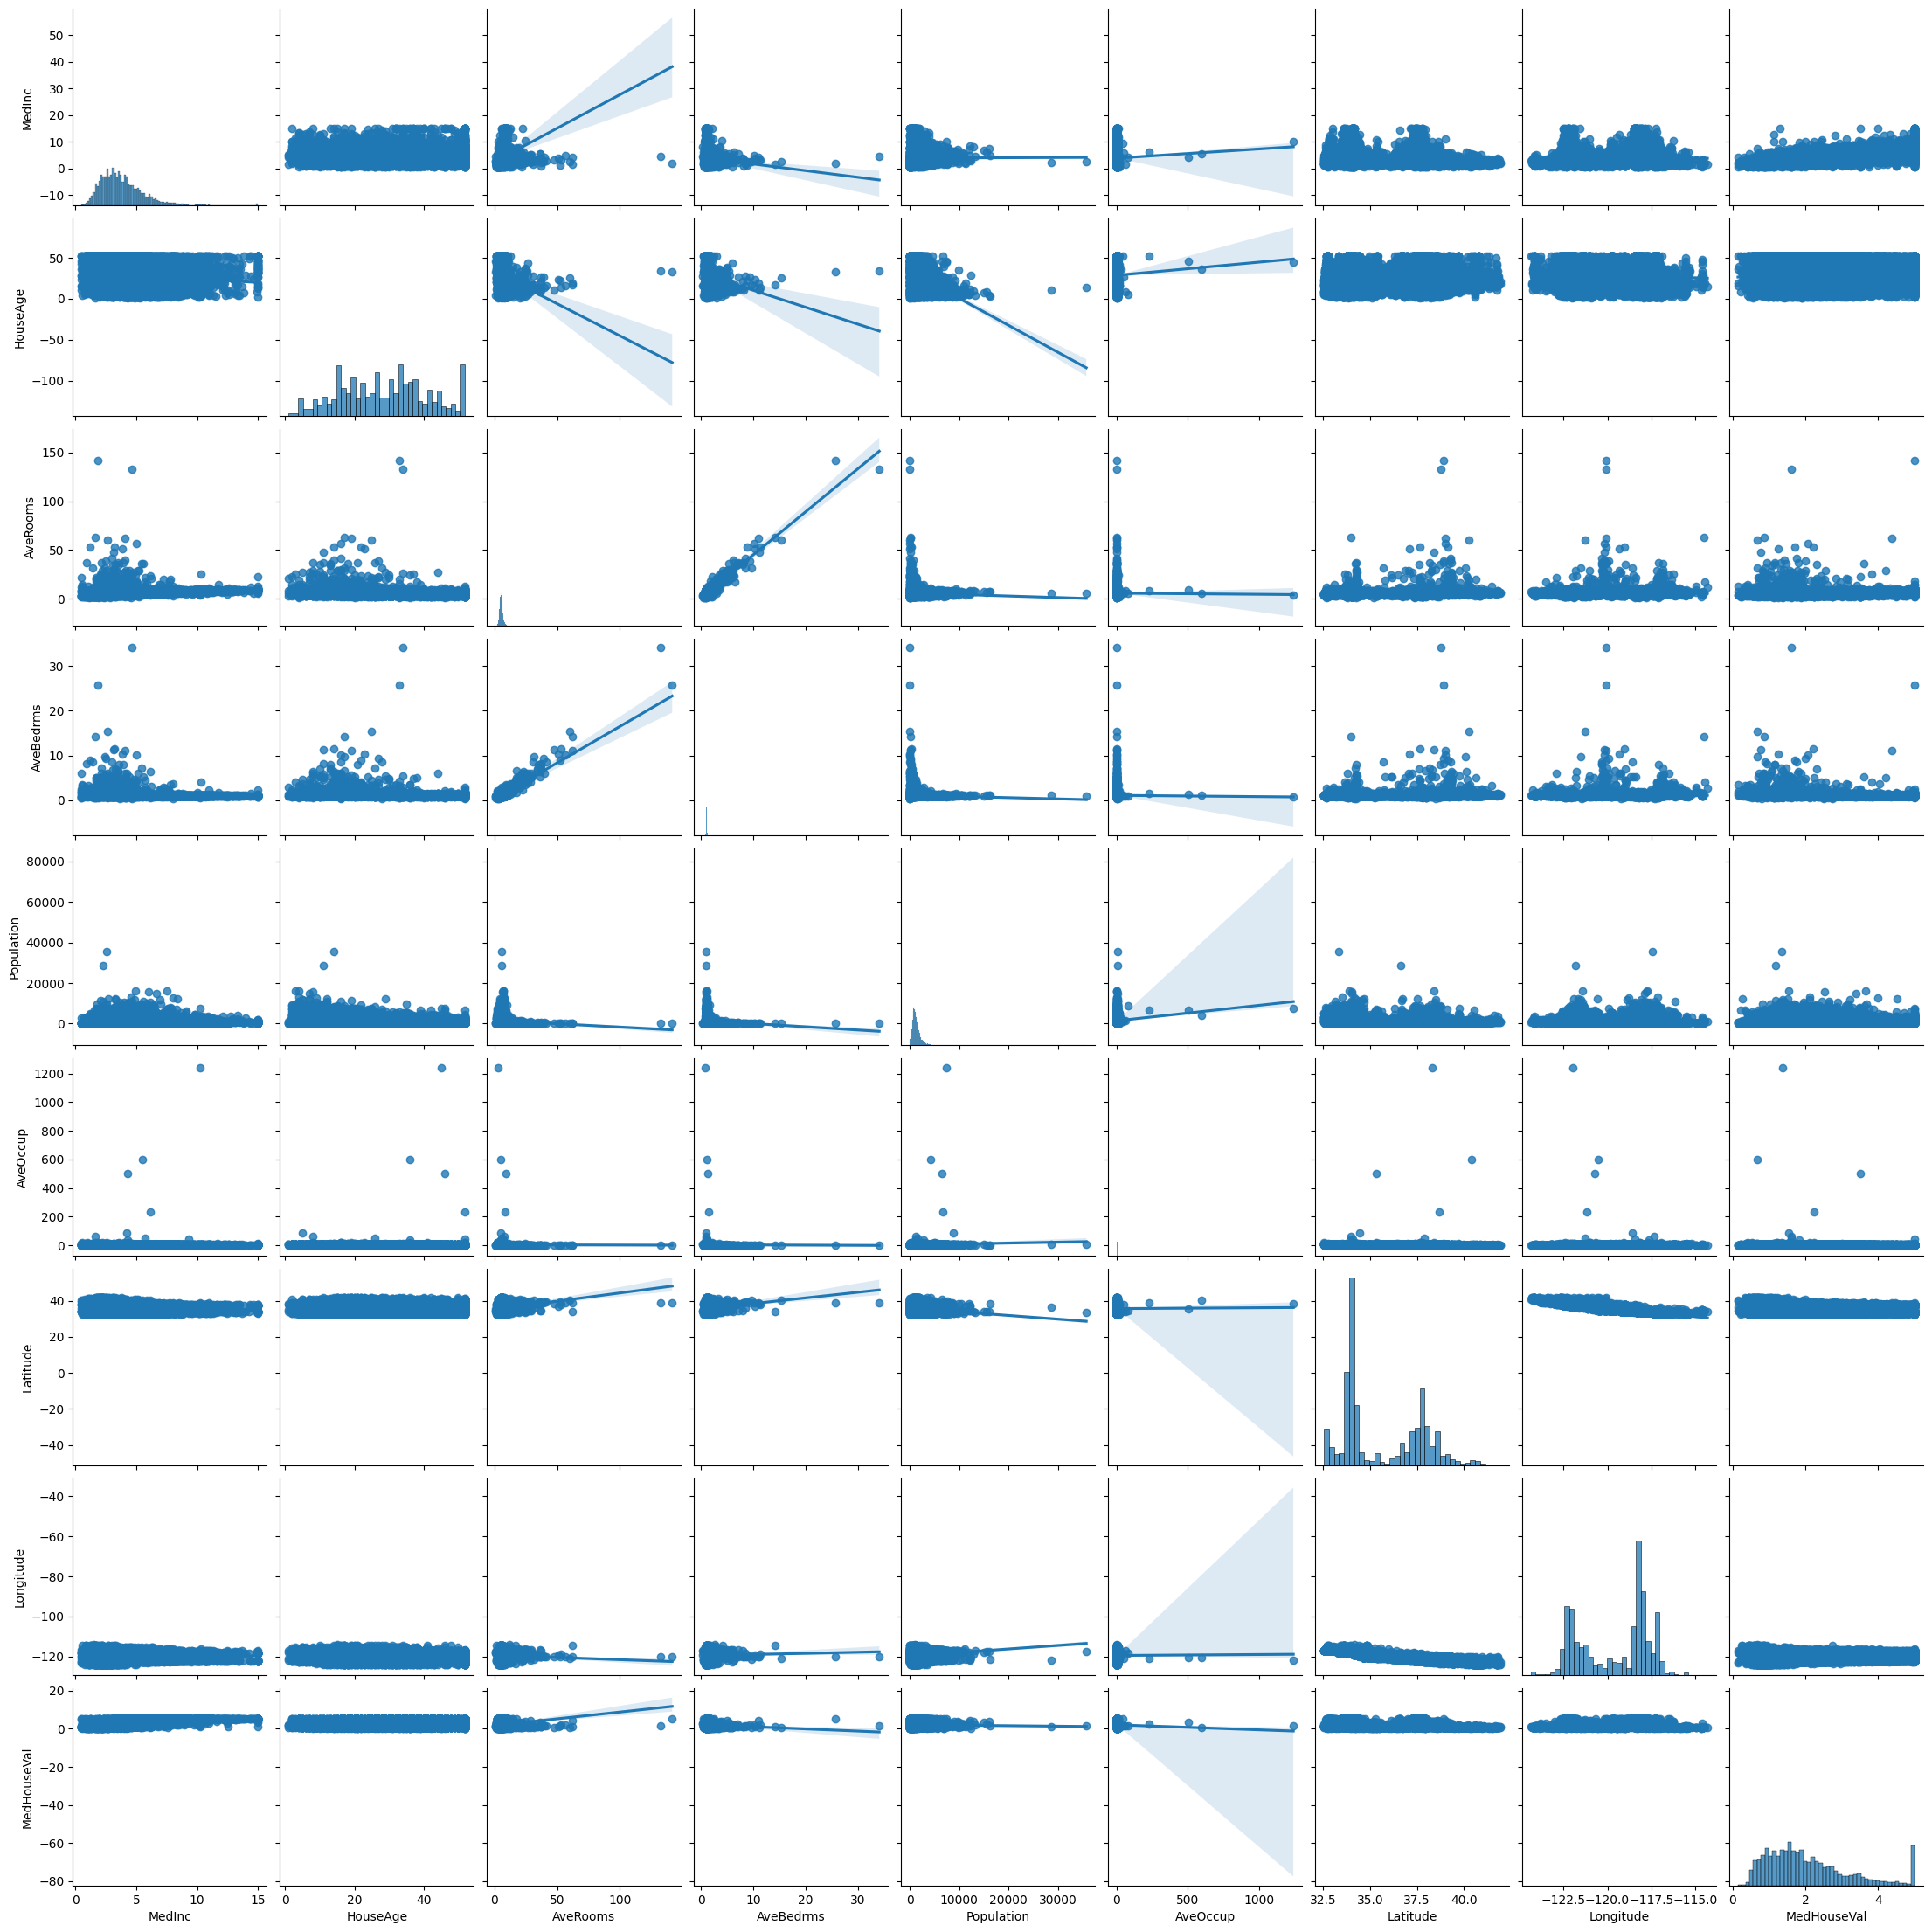

In [100]:
df_california.columns.drop('MedHouseVal')

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

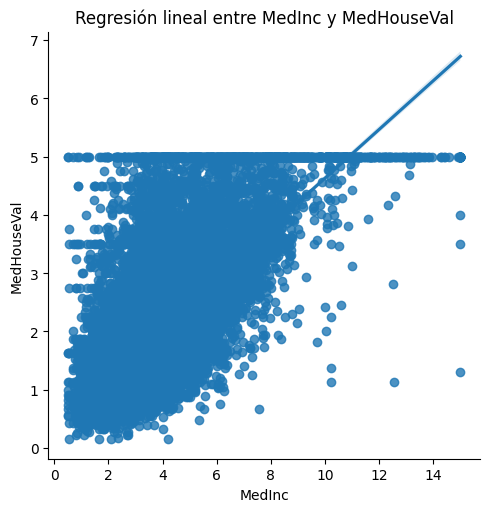

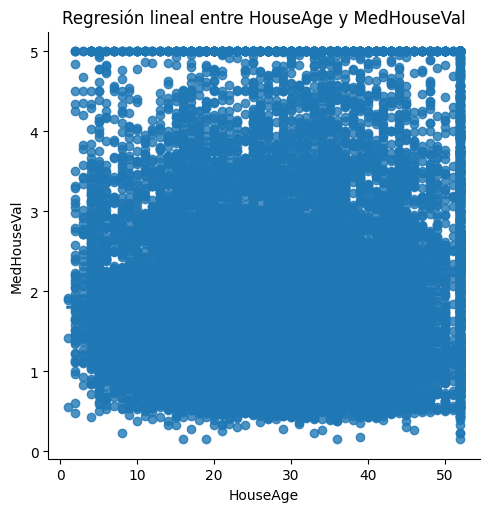

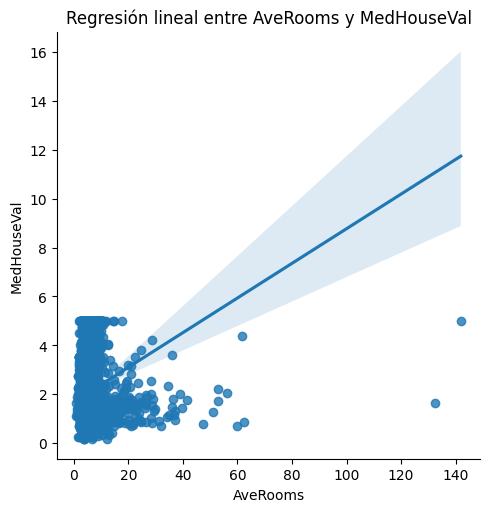

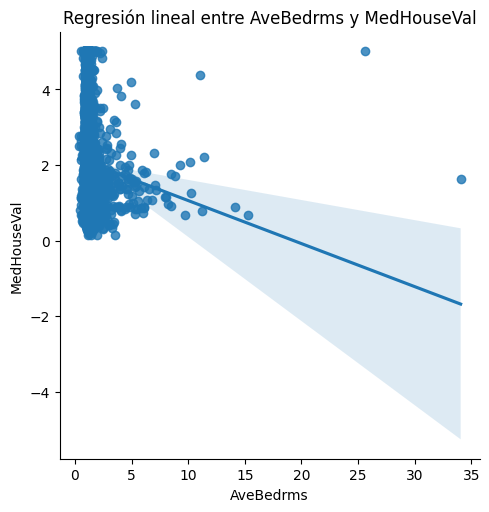

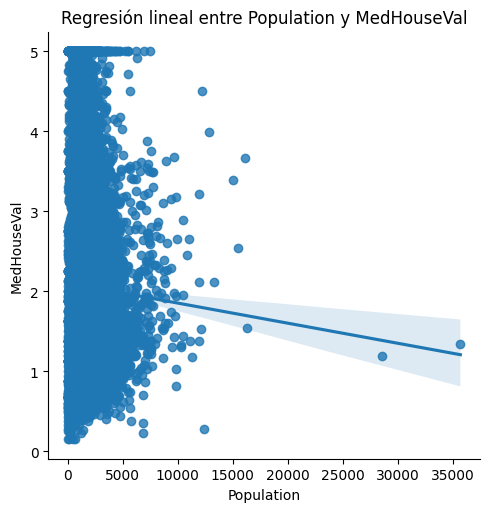

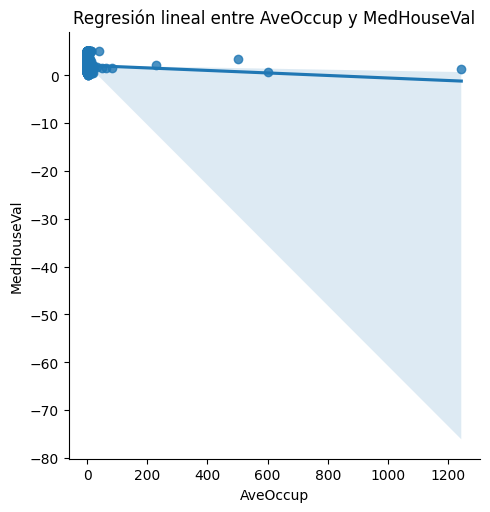

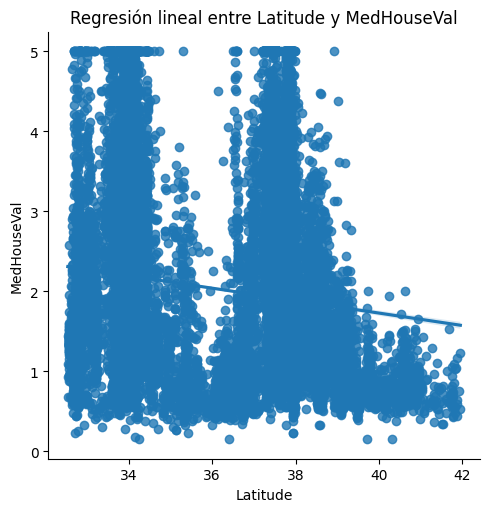

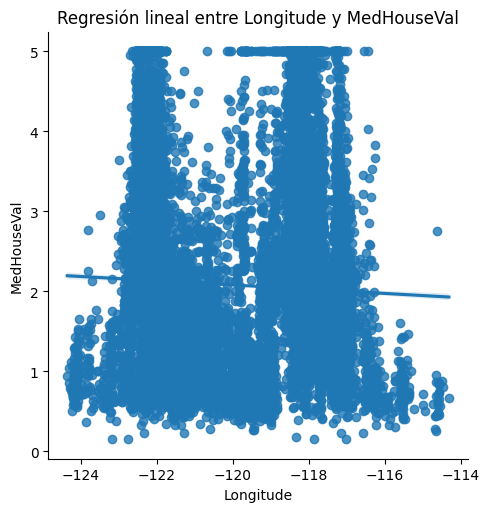

In [101]:
# Listar las columnas excepto 'MedHouseVal'
columnas = df_california.columns.drop('MedHouseVal')

# Generar un lmplot entre cada columna y 'MedHouseVal'
for columna in columnas:
    sns.lmplot(x=columna, y='MedHouseVal', data=df_california)
    plt.title(f'Regresión lineal entre {columna} y MedHouseVal')
    plt.show()

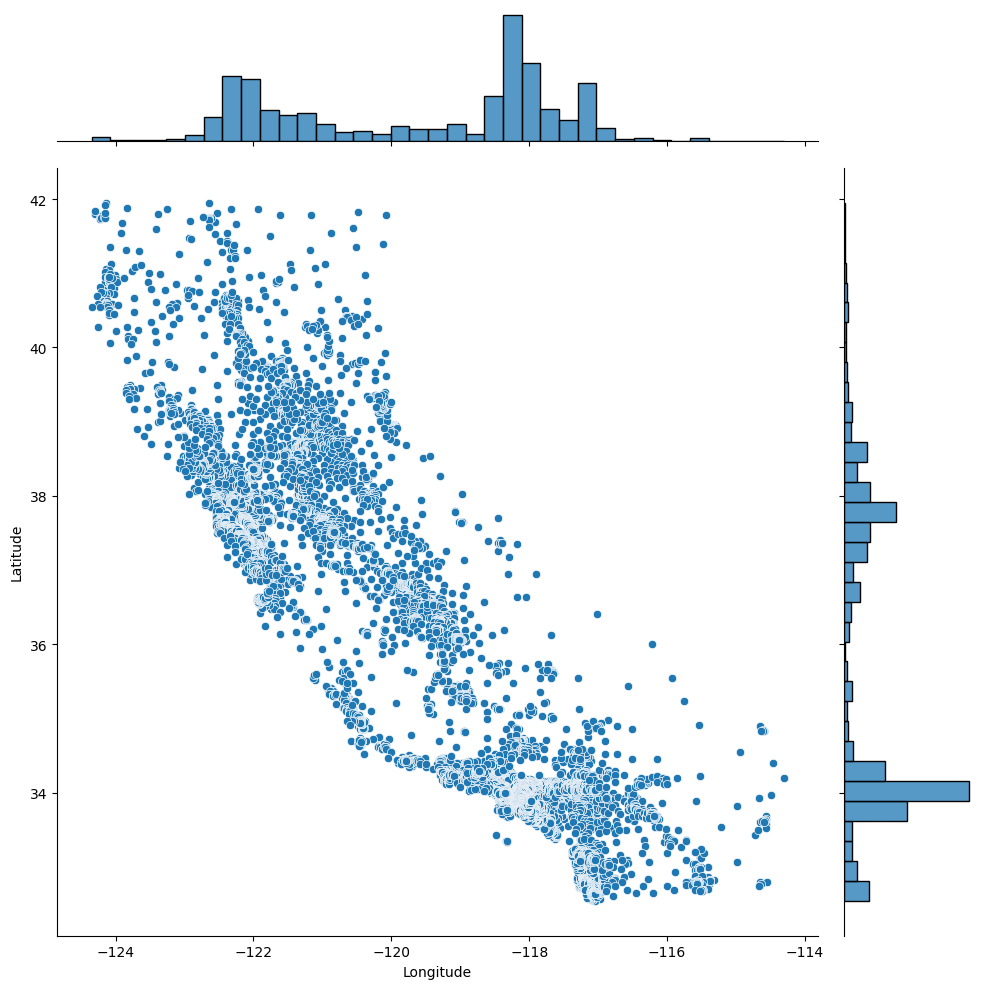

In [102]:
sns.jointplot(data= df_california,
                #.loc[ propiedades_filtro.precio_m2 < 1000 ,:],
                y = 'Latitude', 
                x = 'Longitude', 
                #hue = "property_type",
                height = 10,
                palette ="Spectral_r",
                #kind = "hex", 
                #kind= "kde"
                )

In [103]:
#pip install geopandas
#pip install contextily

In [104]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

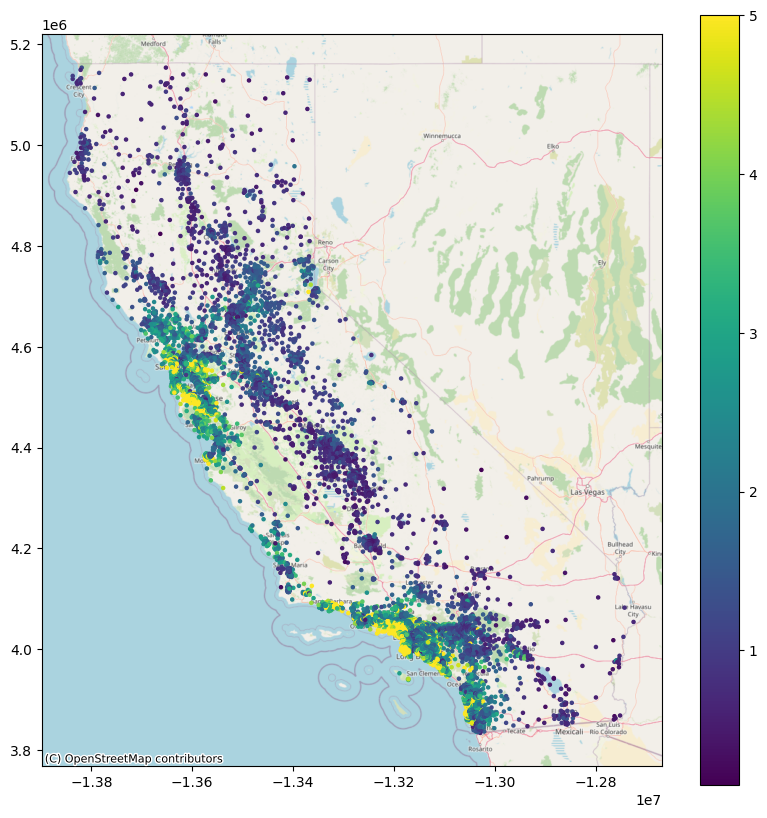

In [110]:
# Crear la geometría de puntos (Latitude, Longitude)
df_california_gpd = df_california.copy()
df_california_gpd['geometry'] = df_california_gpd.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Convertir el DataFrame en un GeoDataFrame
gdf = gpd.GeoDataFrame(df_california_gpd, geometry='geometry')

# Establecer el sistema de coordenadas geográficas (EPSG:4326 para WGS84)
gdf.set_crs(epsg=4326, inplace=True)

# Convertir al sistema de coordenadas proyectadas (Web Mercator) para usar con el mapa base
gdf = gdf.to_crs(epsg=3857)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los puntos en el mapa
gdf.plot(ax=ax, column='MedHouseVal',  # Especificar la columna para el color
        cmap='viridis',        # Usar una paleta continua (puedes cambiar por 'plasma', 'inferno', etc.)
        legend=True,  
        marker='o', markersize=5)

# Añadir un mapa base usando contextily (OpenStreetMap)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Mostrar el mapa
plt.show()

¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.

In [111]:
df_california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [113]:
df_california.corr()[['MedHouseVal']].sort_values(['MedHouseVal'], ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


*La Edad mediana de las casas en el bloque es la que tiene mayor correlacion con MedHouseVal*

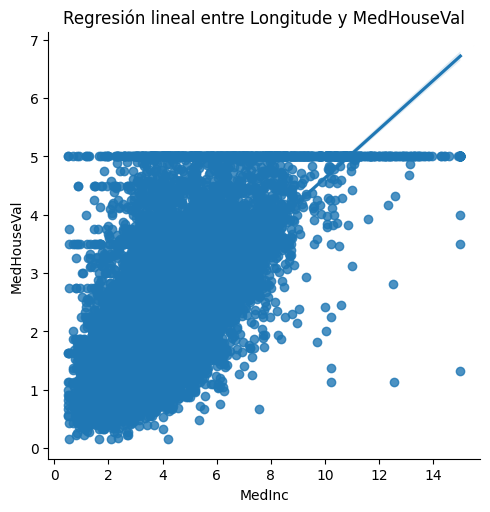

In [114]:
sns.lmplot(x='MedInc', y='MedHouseVal', data=df_california)
plt.title(f'Regresión lineal entre {columna} y MedHouseVal')
plt.show()

Population: Población del bloque y HouseAge (-0.30)

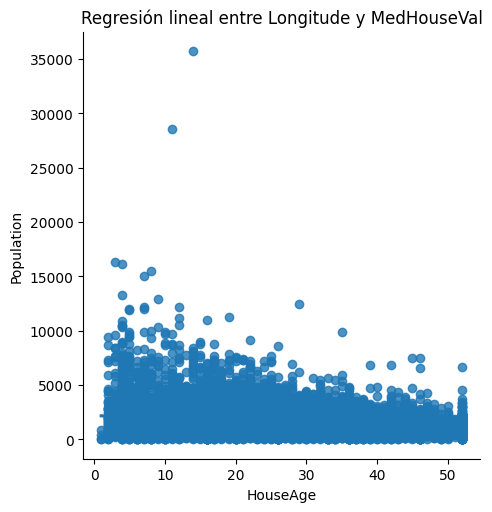

In [115]:
sns.lmplot(x='HouseAge', y='Population', data=df_california)
plt.title(f'Regresión lineal entre {columna} y MedHouseVal')
plt.show()

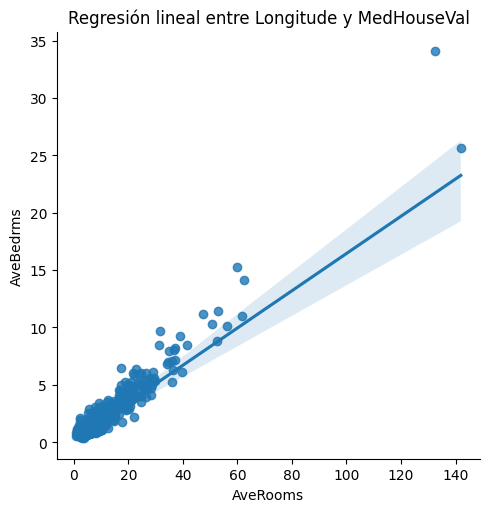

In [116]:
sns.lmplot(x='AveRooms', y='AveBedrms', data=df_california)
plt.title(f'Regresión lineal entre {columna} y MedHouseVal')
plt.show()

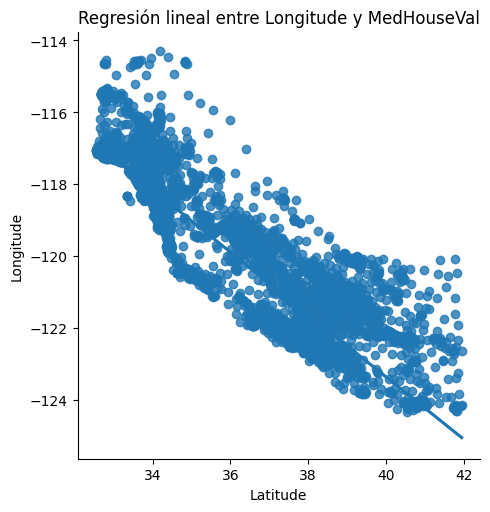

In [117]:
sns.lmplot(x='Latitude', y='Longitude', data=df_california)
plt.title(f'Regresión lineal entre {columna} y MedHouseVal')
plt.show()

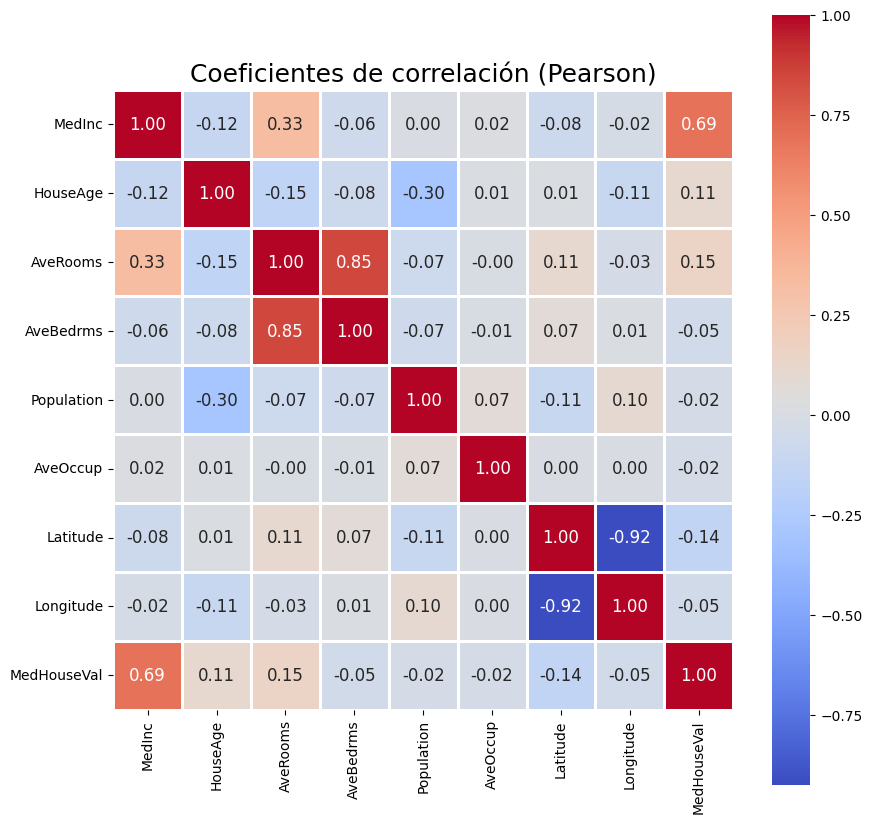

## Consigna 2:
Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?

In [118]:
def plot_box_hist(data, column, figsize=(15, 8)):
    """
    Crea un gráfico con un boxplot encima y un histograma debajo de una columna de datos.

    Parámetros:
    - data: DataFrame de pandas.
    - column: Columna del DataFrame que se quiere graficar.
    - threshold: Umbral opcional para filtrar los valores de la columna (por defecto no hay umbral).
    - figsize: Tamaño de la figura (ancho, alto), por defecto (15, 8).
    """
    
    # Crear la figura y los ejes
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Graficar el boxplot y el histograma
    sns.boxplot(data=data, x=column, ax=ax_box)
    sns.histplot(data[column], ax=ax_hist)
    
    # Eliminar el nombre del eje x en el boxplot
    ax_box.set(xlabel='')
    
    # Ajustar el tamaño de la figura
    plt.gcf().set_size_inches(*figsize)
    
    # Mostrar el gráfico
    plt.show()

In [125]:
def plot_all_numeric_columns(df, figsize=(15, 8)):
    """
    Recorre todas las columnas numéricas de un DataFrame y genera un gráfico con un boxplot y un histograma
    para cada una.

    Parámetros:
    - df: DataFrame de pandas.
    - threshold: Umbral opcional para filtrar los valores de cada columna (por defecto no hay umbral).
    - figsize: Tamaño de la figura (ancho, alto), por defecto (15, 8).
    """
    
    # Obtener las columnas numéricas del DataFrame
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    # Iterar sobre cada columna numérica
    for column in numeric_columns:
        print(f"Generando gráficos para la columna: {column}")
        plot_box_hist(df, column, figsize=figsize)

# Función plot_box_hist (definida anteriormente) sigue siendo la misma

Generando gráficos para la columna: MedInc


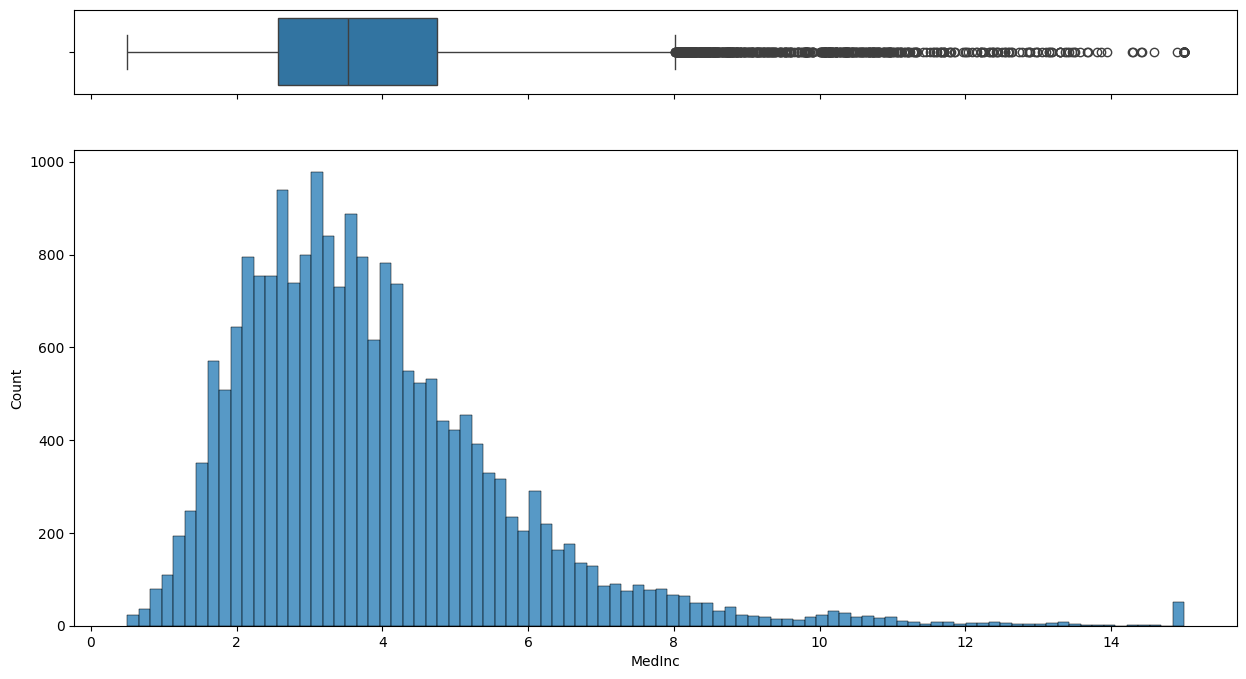

Generando gráficos para la columna: HouseAge


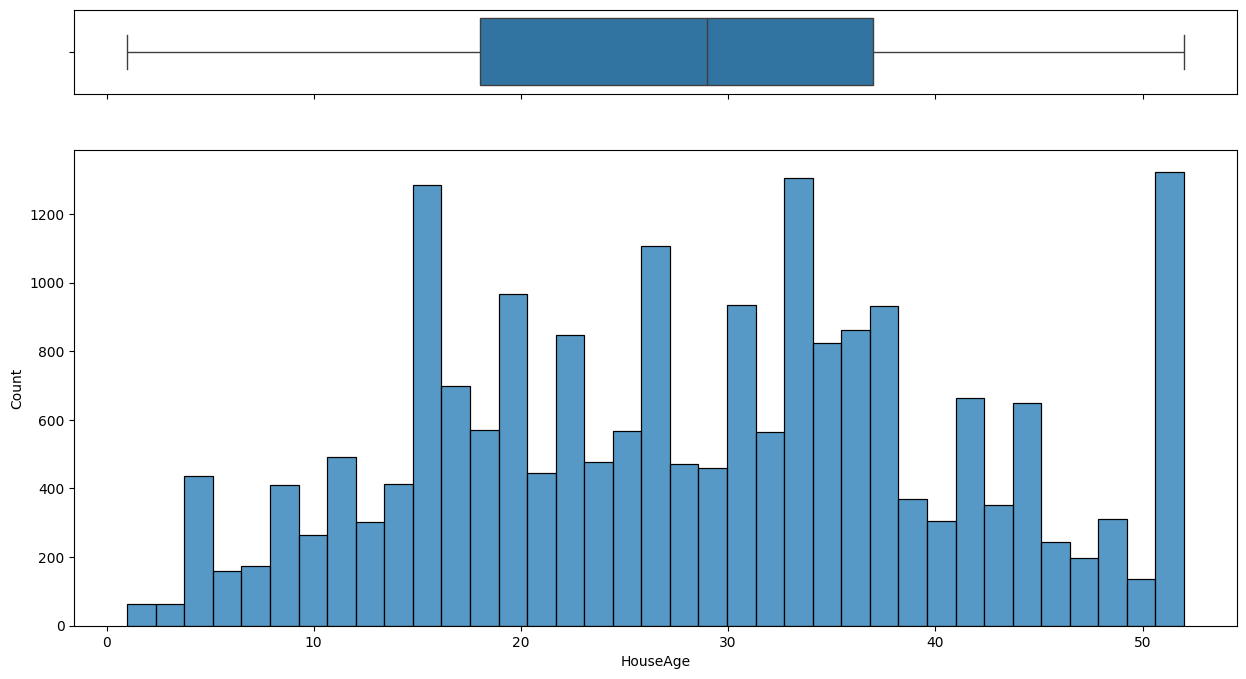

Generando gráficos para la columna: AveRooms


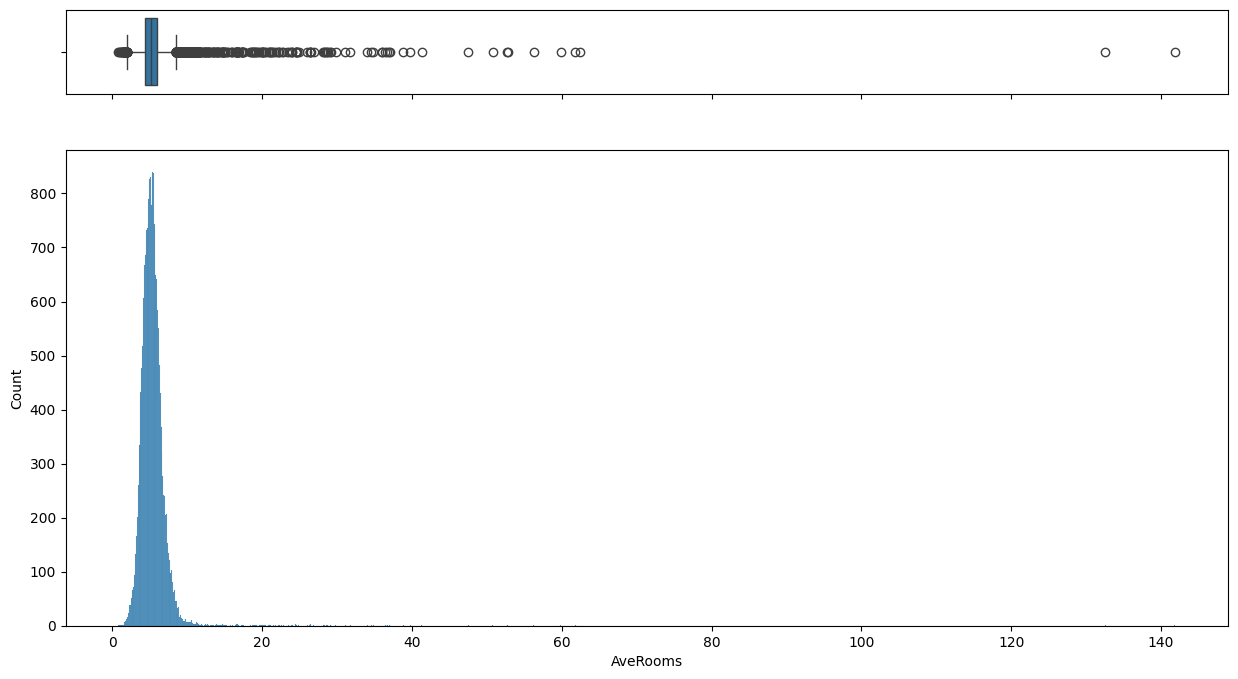

Generando gráficos para la columna: AveBedrms


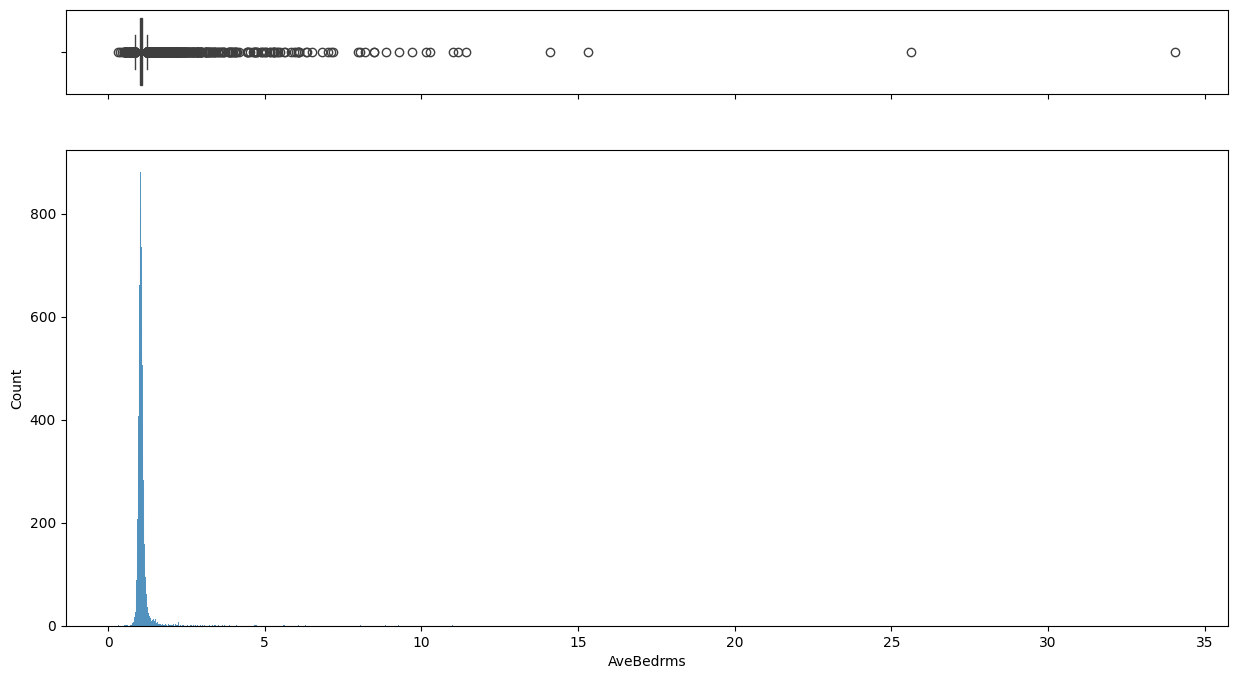

Generando gráficos para la columna: Population


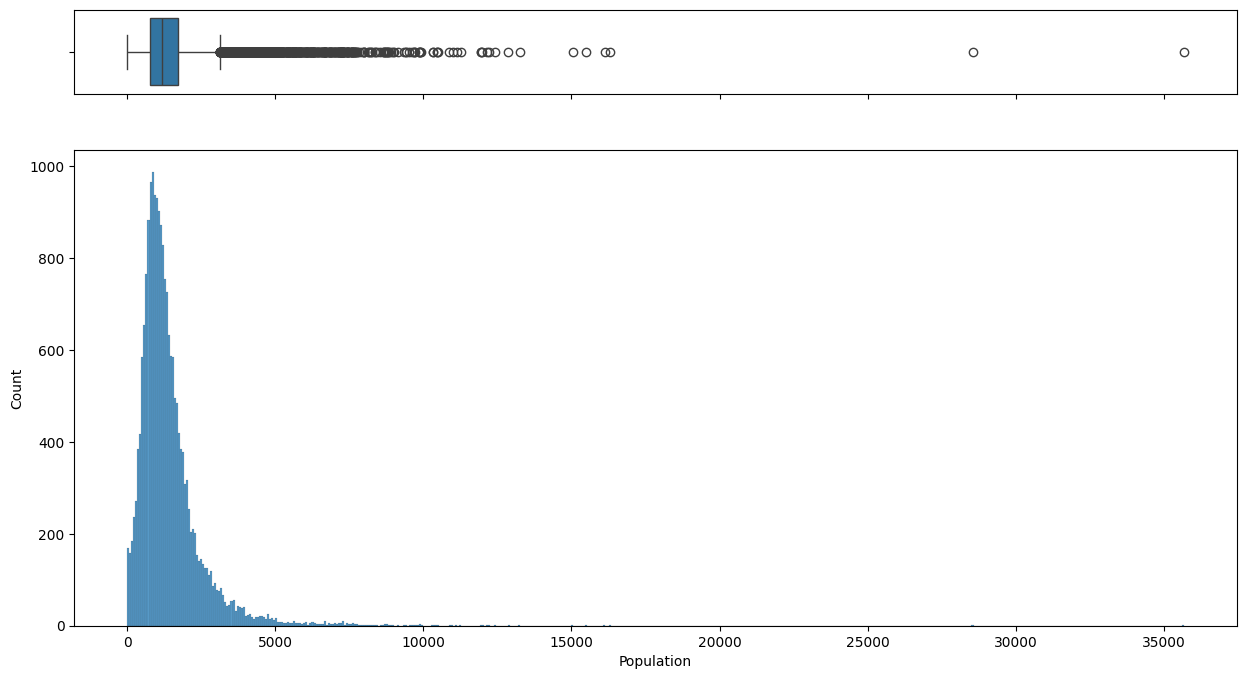

Generando gráficos para la columna: AveOccup


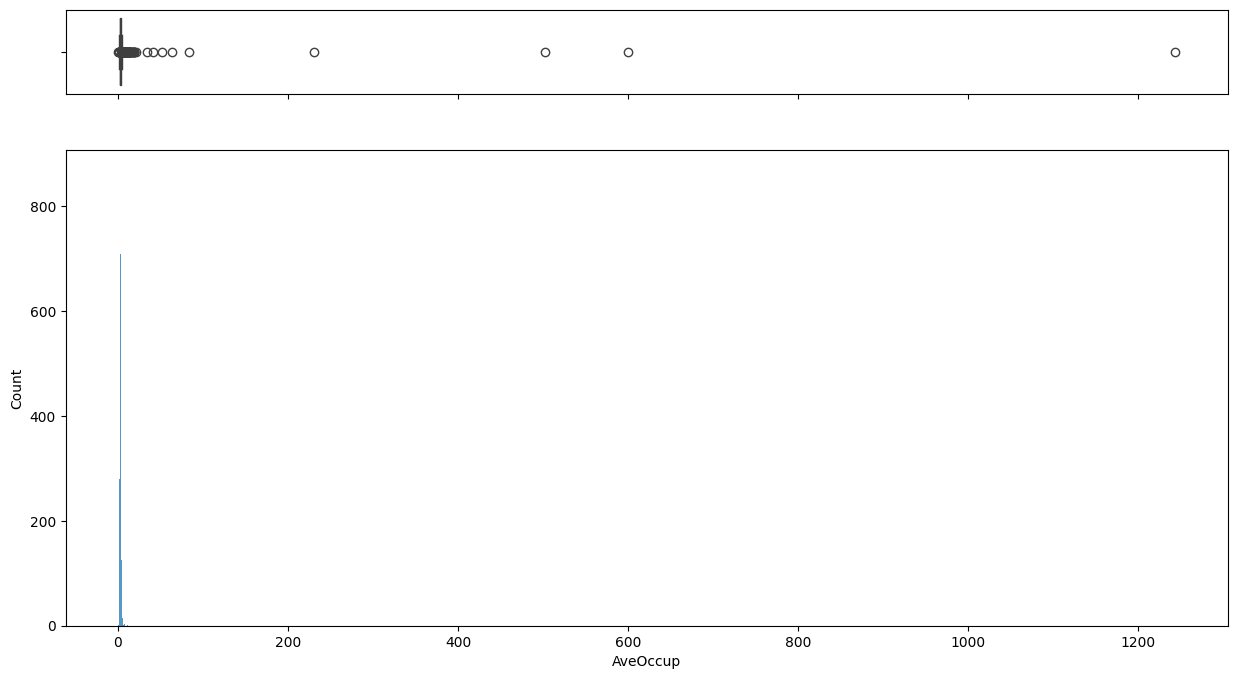

Generando gráficos para la columna: Latitude


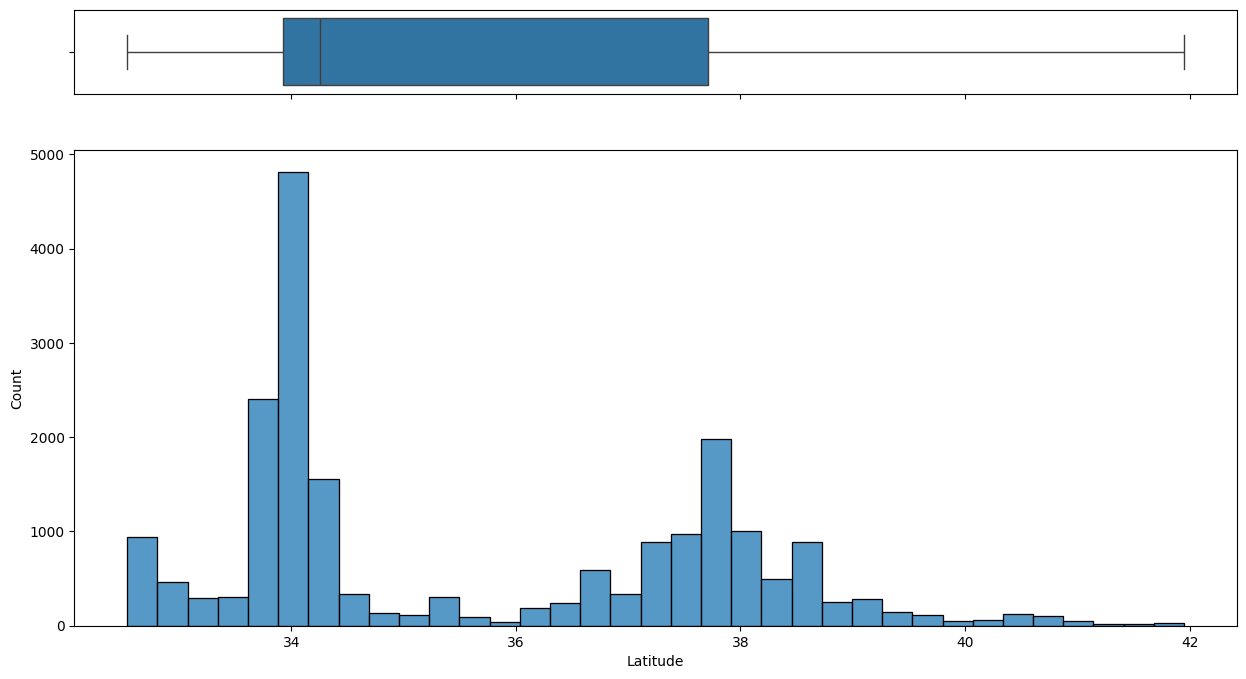

Generando gráficos para la columna: Longitude


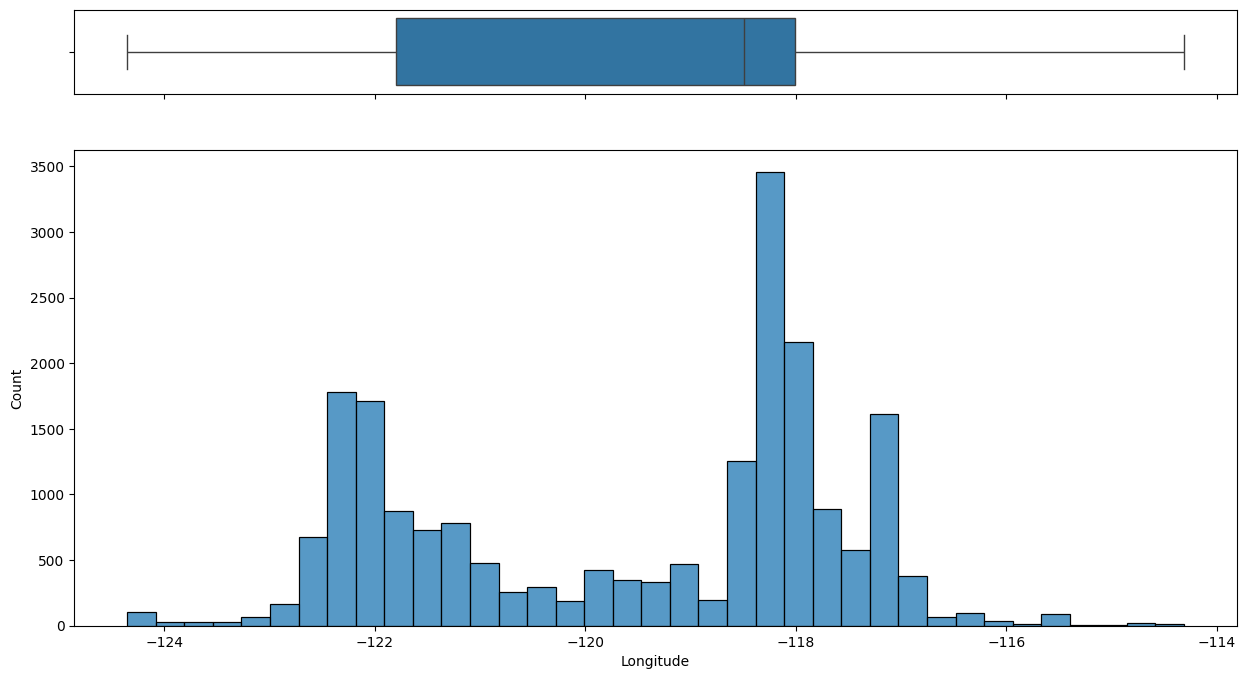

Generando gráficos para la columna: MedHouseVal


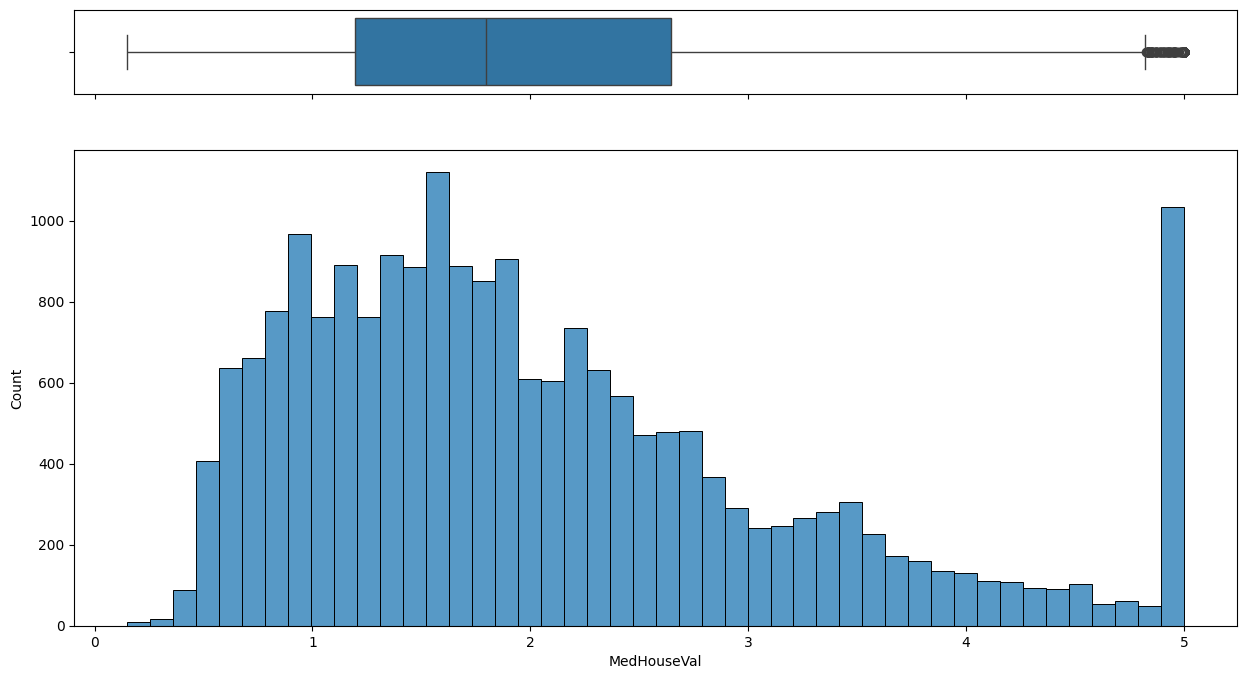

In [126]:
plot_all_numeric_columns(df_california)

In [136]:
from sklearn.preprocessing import StandardScaler

In [139]:
# Crear una instancia del escalador
scaler = StandardScaler()

# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = df_california.select_dtypes(include=['number']).columns

# Ajustar el escalador y transformar los datos
df_scaled = pd.DataFrame(scaler.fit_transform(df_california[numeric_columns]), columns=numeric_columns)


In [140]:
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


Generando gráficos para la columna: MedInc


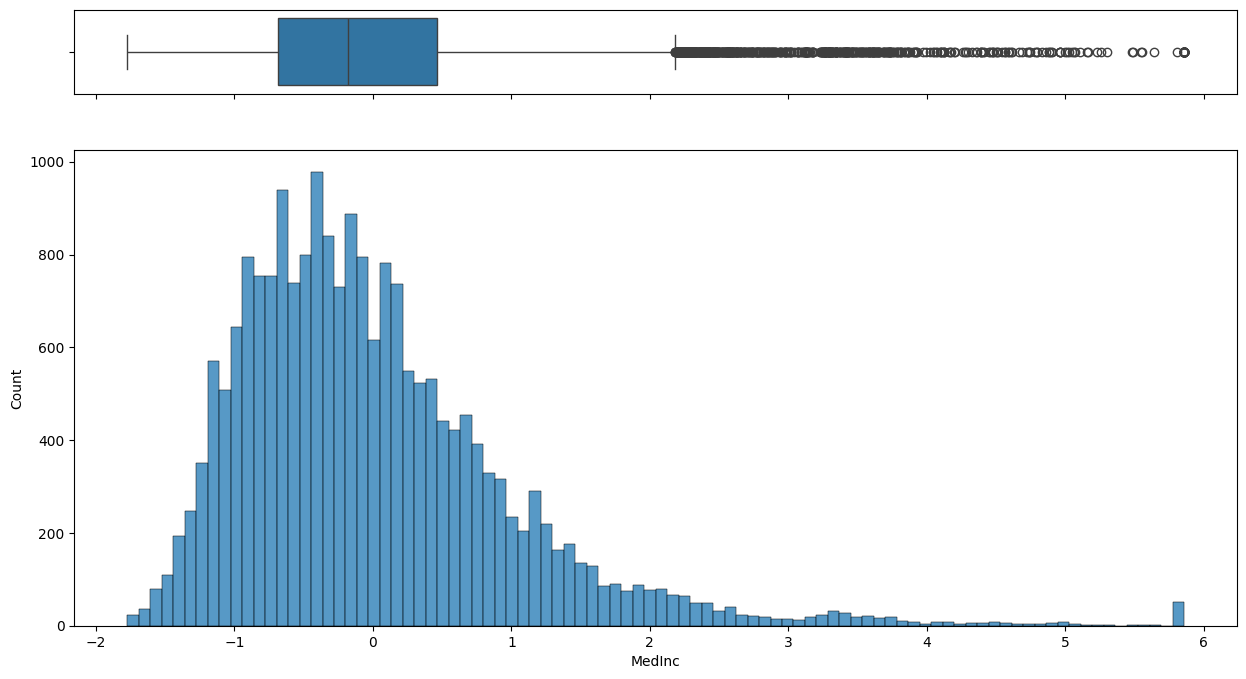

Generando gráficos para la columna: HouseAge


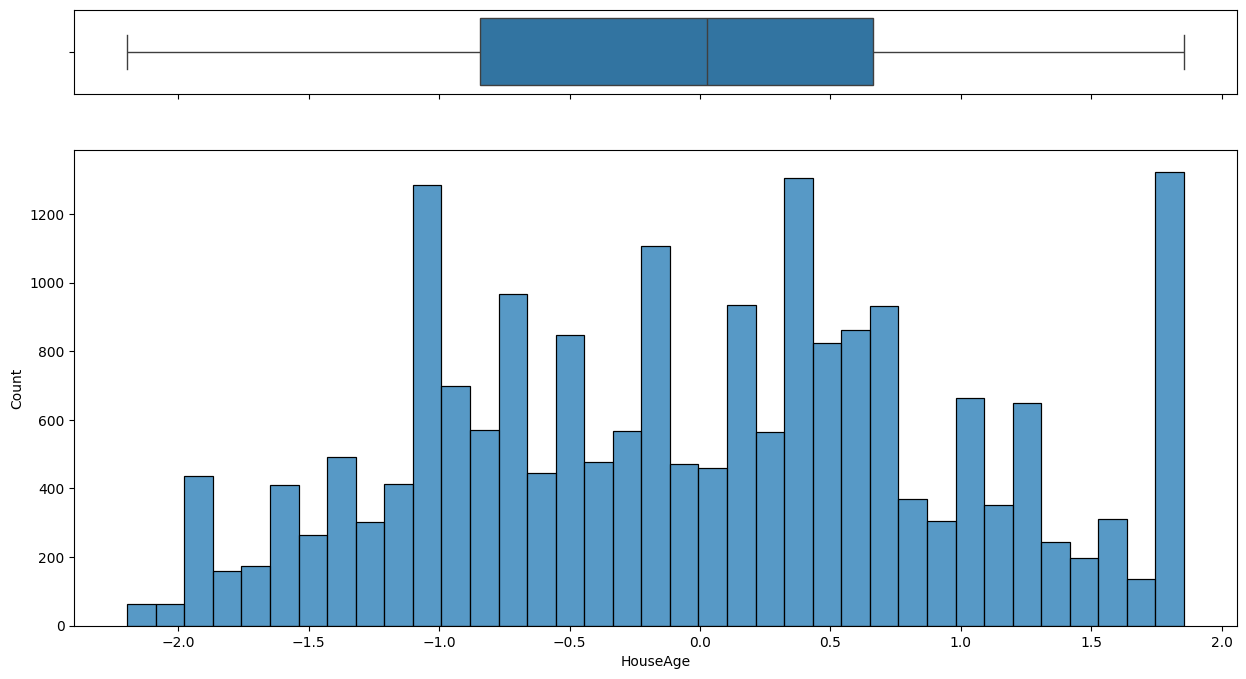

Generando gráficos para la columna: AveRooms


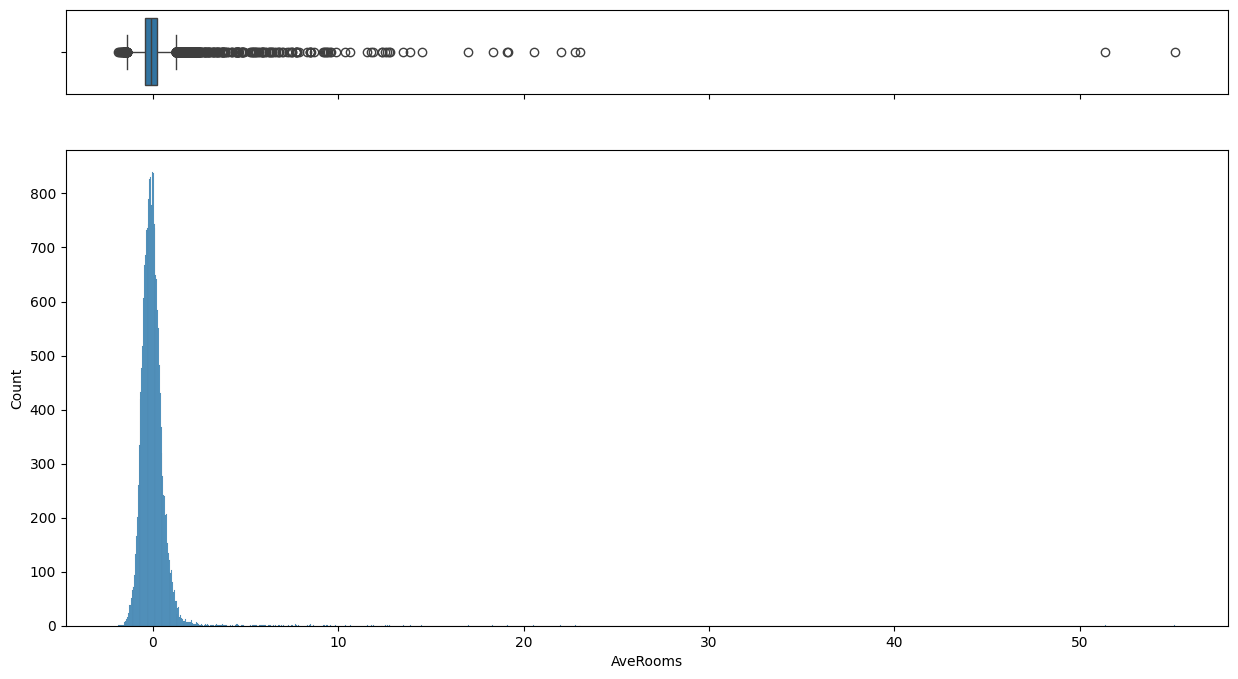

Generando gráficos para la columna: AveBedrms


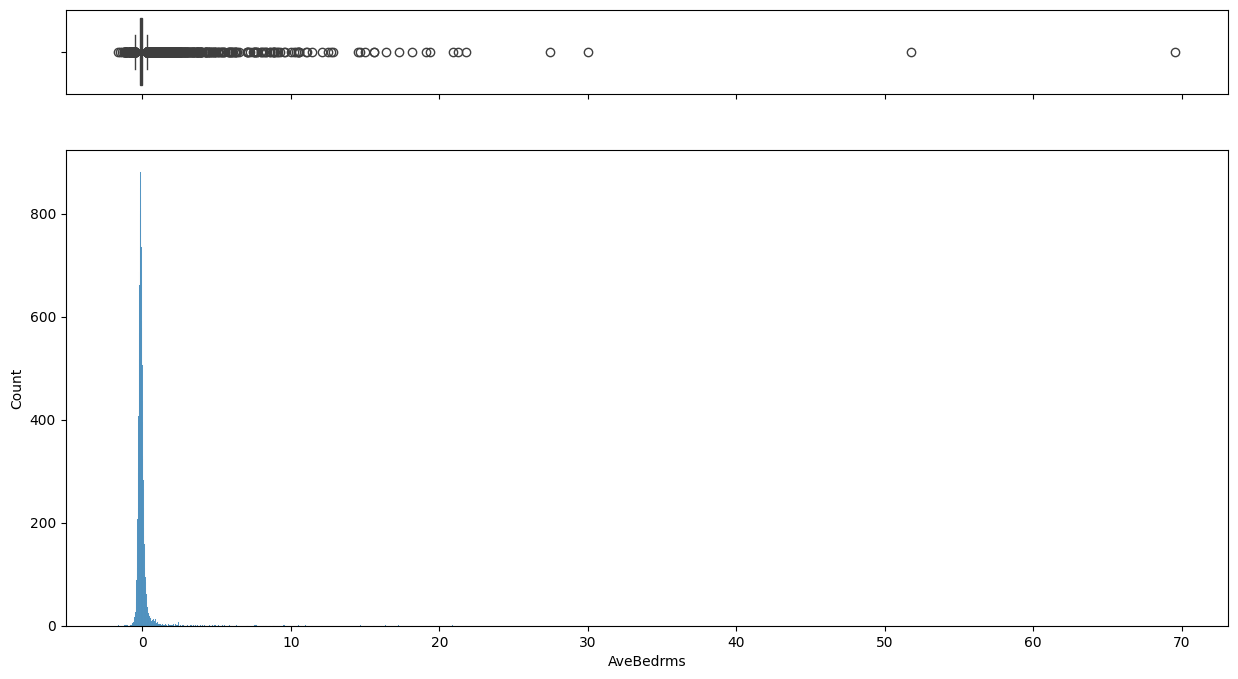

Generando gráficos para la columna: Population


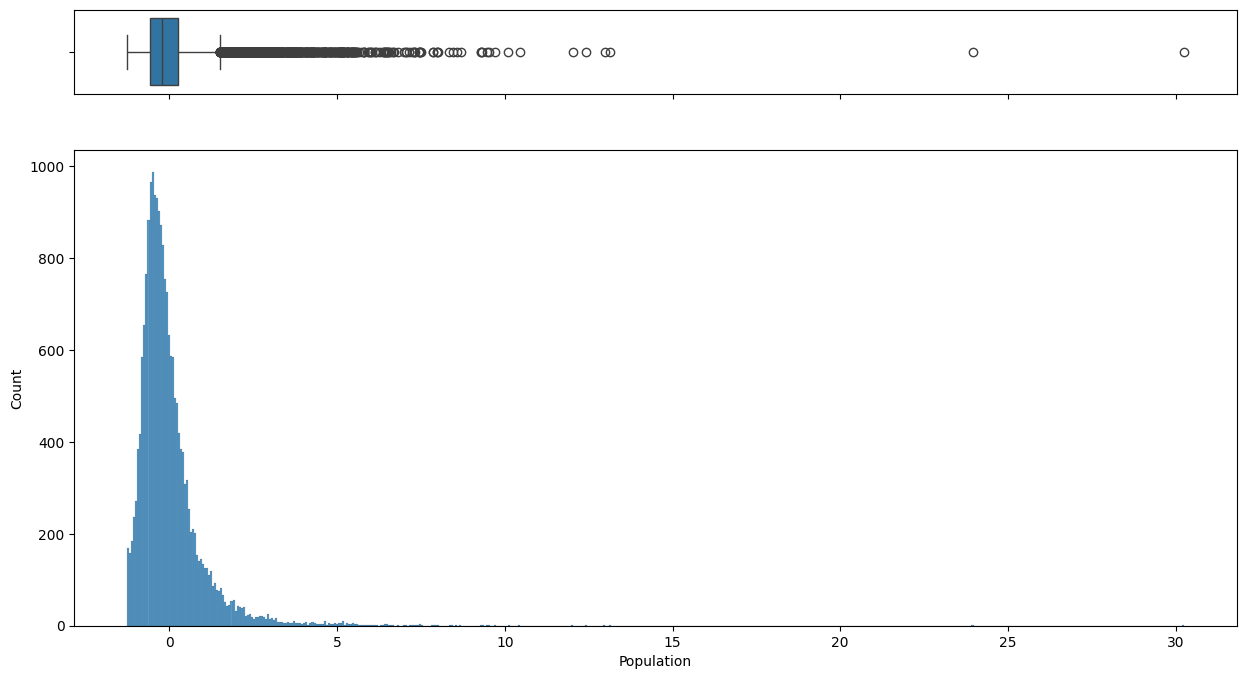

Generando gráficos para la columna: AveOccup


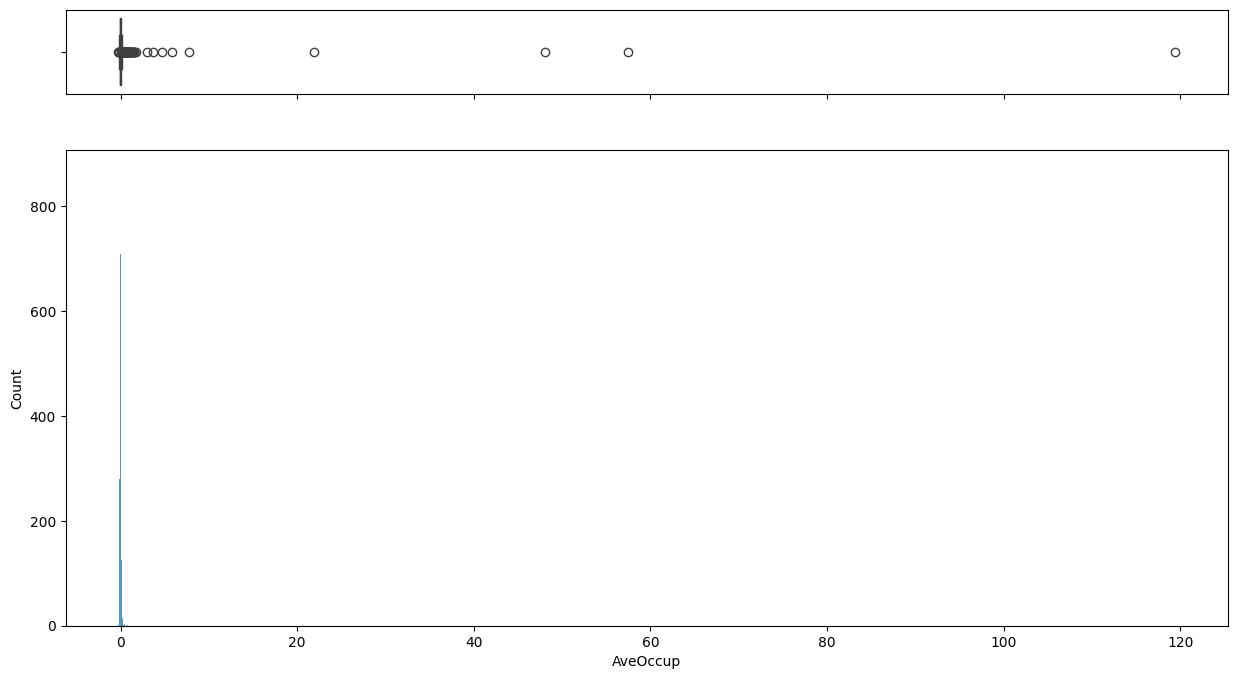

Generando gráficos para la columna: Latitude


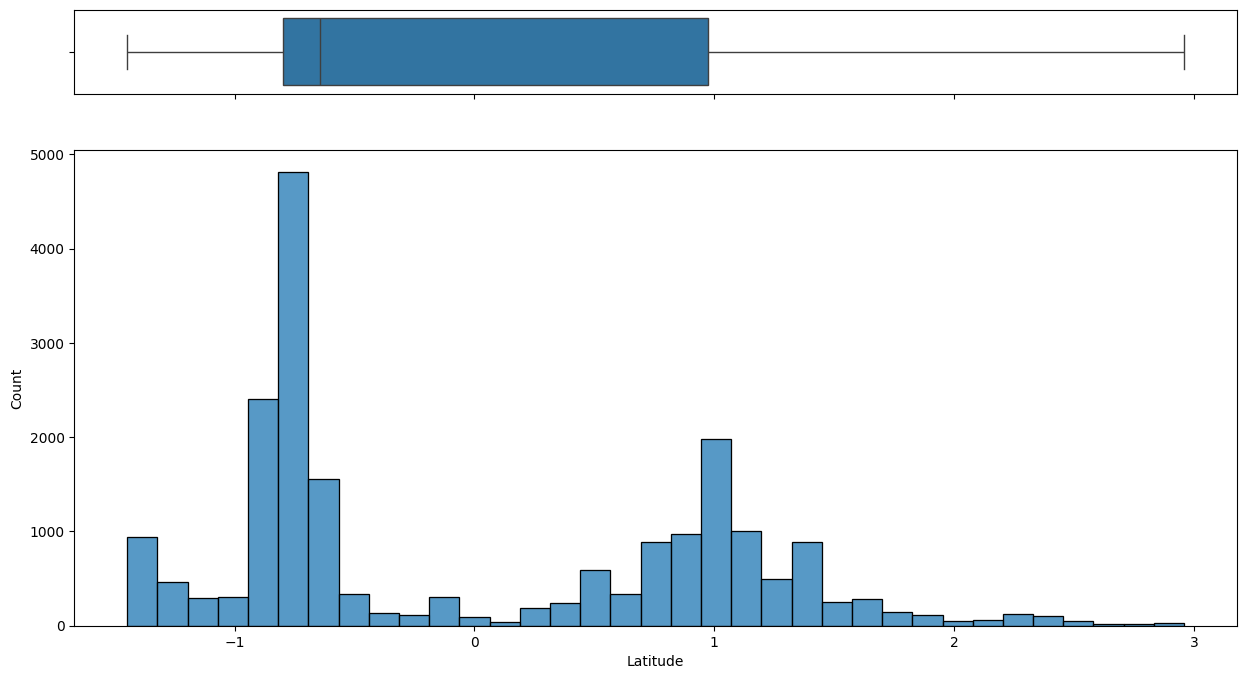

Generando gráficos para la columna: Longitude


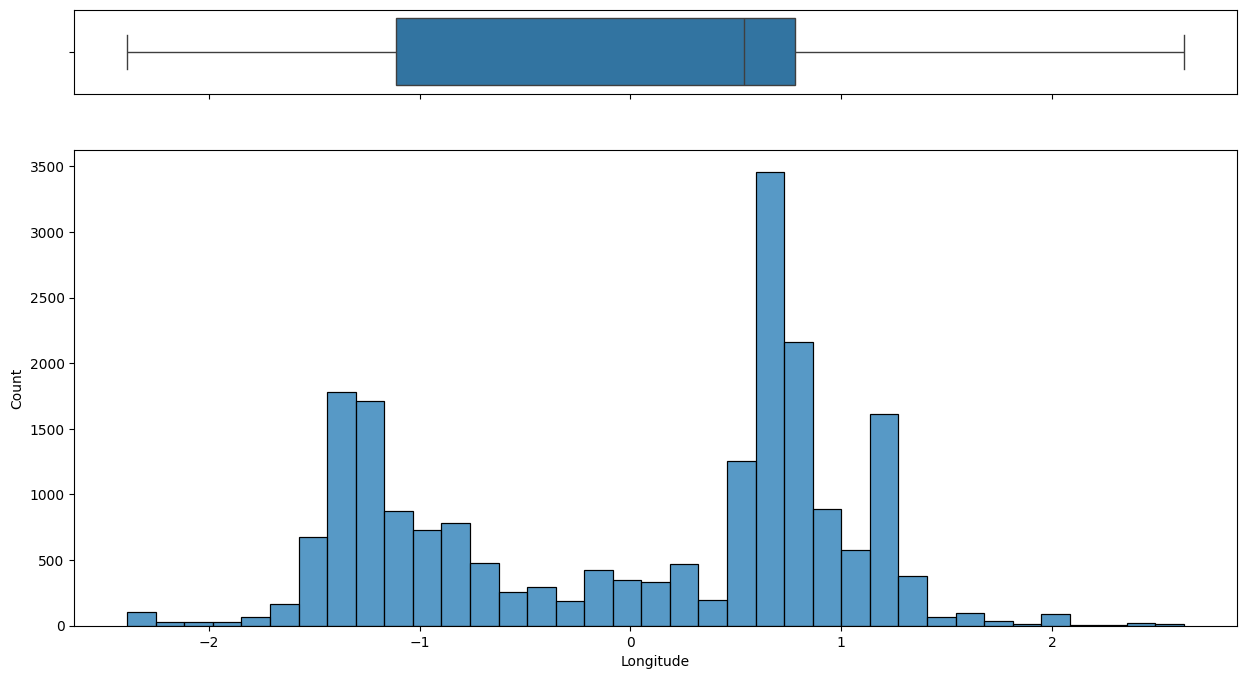

Generando gráficos para la columna: MedHouseVal


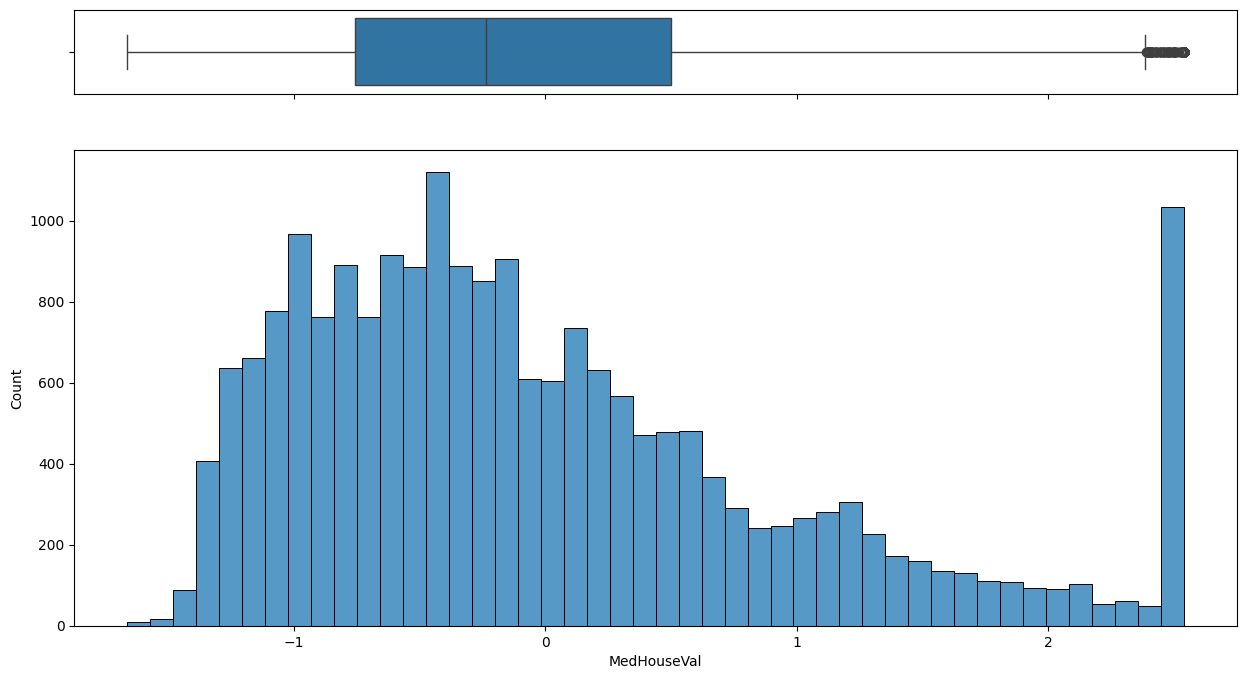

In [141]:
plot_all_numeric_columns(df_scaled)

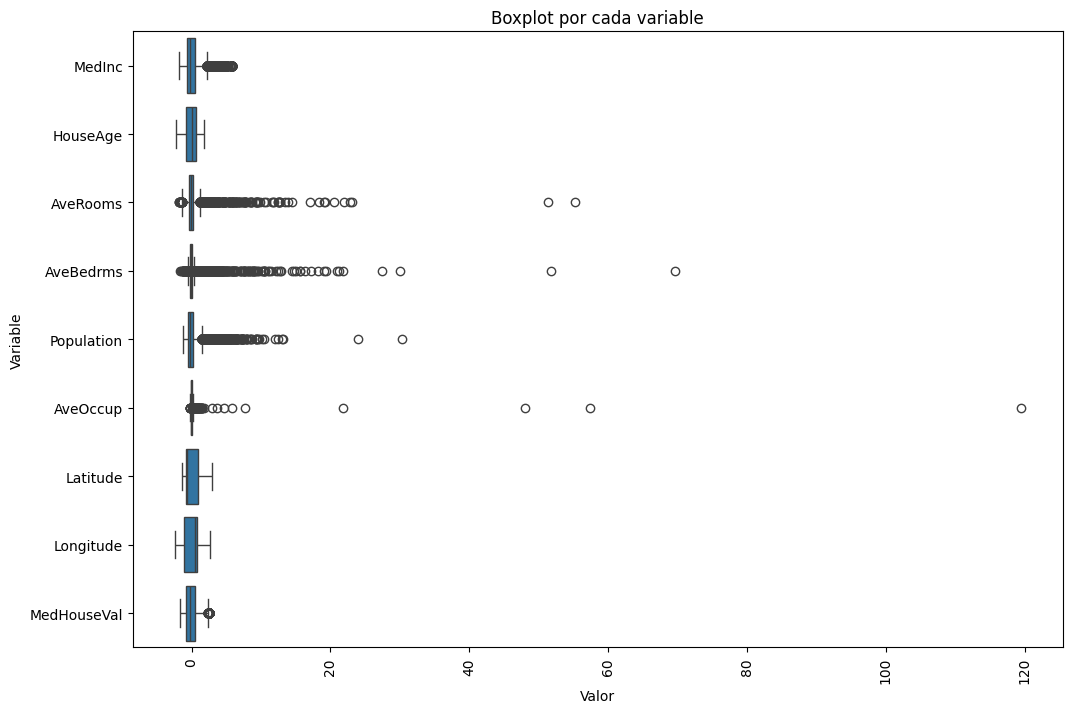

In [143]:
# Crear un boxplot con seaborn para cada variable
plt.figure(figsize=(12, 8))
sns.boxplot(y='Variable', x='Valor', 
            data=pd.melt(df_scaled, 
                         var_name='Variable', 
                         value_name='Valor'))
plt.xticks(rotation=90)  # Rotar los nombres de las columnas para que sean más legibles
plt.title('Boxplot por cada variable')
plt.show()